## CS-GY 6953 / ECE-GY 7123     Fall 2021
# Project code - Logistic Regressions

### Project Title: Comparison of Machine Learning Methods and Discrete Choice Models in Predicting the Travel Mode Choices of NYC Residents

## Bingqing Liu
### PhD Candidate in Transportation Engineering and Planning
### bl2453@nyu.edu

In [101]:
import pandas as pd
import numpy as np
import geopandas as gpd

## Project purpose
### Using the 2019 NYC Citywide Mobility Survey data to predict travel mode choice using deep learning models
### Data: 
### - trip data: mode of the trip ( y ), other features of the trip
### - traveler demographic data: features of the traveler of the trip, merged to the trip data 

-------------

# Trip data
### Main dataset

In [2]:
trips = pd.read_csv("Citywide_Mobility_Survey_-_Trip_Survey_2019.csv")

----------

# Person data
### demographic and behavioral information of the traveler
### merged to the trip dataset to add more x

In [3]:
person_id = np.array(trips['person_id'])

In [4]:
unique_person = np.unique(person_id)

In [5]:
len(unique_person)

3037

In [6]:
persons = pd.read_csv("Citywide_Mobility_Survey_-_Person_Survey_2019.csv")
persons.shape

(8286, 165)

In [7]:
trips_person = trips.merge(persons, left_on = "person_id", right_on = "person_id")

--------

# Dropping useless features

In [8]:
### check the original columns
col = trips_person.columns
for i in range(len(col)):
    print(i, col[i])

0 hh_id_x
1 trip_weight
2 home_cms_zone
3 survey_mode_x
4 person_id
5 person_num_x
6 day_num
7 travel_date
8 travel_date_dow
9 trip_id
10 trip_num
11 leg_num
12 unlinked_trip
13 linked_trip_num
14 survey_complete
15 depart_time
16 arrive_time
17 o_cms_zone
18 d_cms_zone
19 trip_duration
20 trip_distance
21 o_purpose
22 o_purpose_category
23 d_purpose
24 d_purpose_category
25 num_non_hh_travelers
26 num_hh_travelers
27 num_travelers
28 hh_member_1
29 hh_member_2
30 hh_member_3
31 hh_member_4
32 hh_member_5
33 hh_member_6
34 hh_member_7
35 hh_member_8
36 hh_member_9
37 hh_member_10
38 hh_member_11
39 mode_type
40 mode_type_detailed
41 sustainable_mode
42 mode_1
43 mode_2
44 mode_3
45 mode_4
46 driver
47 park_location
48 park_pay
49 park_cost
50 used_transit
51 transit_access
52 transit_egress
53 taxi_cost
54 taxi_cost_amount
55 bike_park_location
56 scooter_park_location
57 analyst_split
58 analyst_merge
59 analyst_split_loop
60 user_merged
61 user_split
62 added_trip
63 high_speed_flag


In [9]:
trips_person = trips_person.drop(["hh_id_y",
                                  "survey_mode_y",
                                  "person_num_y",
                                  "survey_mode_x",
                                  "travel_date",
                                  "travel_date_dow",
                                  "trip_num",
                                  'trip_weight',
                                  "leg_num",
                                  "linked_trip_num",
                                  "depart_time",
                                  "arrive_time",
                                  "mode_1",
                                  "mode_2",
                                  "mode_3",
                                  "mode_4",
                                  "analyst_split",
                                  "analyst_merge",
                                  "analyst_split_loop",
                                  "user_merged",
                                  'user_split',
                                  'added_trip',
                                  'invalid_purpose_flag',
                                  'o_purpose',
                                  'o_purpose_category',
                                  'd_purpose',
                                  'd_purpose_category',
                                  'weight',
                                  "is_participant",
                                  'num_days',
                                  'num_days_complete',
                                  'first_travel_date',
                                  'last_travel_date',
                                  'made_trips',
                                  'relationship',
                                  'missing_work_location',
                                  'missing_school_location',
                                  'school_mode_scooter',
                                  'school_scooter_park',
                                  "hh_member_1",
                                  "hh_member_2",
                                  "hh_member_3",
                                  "hh_member_4",
                                  "hh_member_5",
                                  "hh_member_6",
                                  "hh_member_7",
                                  "hh_member_8",
                                  "hh_member_9",
                                  "hh_member_10",
                                  "hh_member_11",
                                  "person_id",
                                  "person_num_x",
                                  "day_num",
                                  "hh_id_x",
                                  "survey_complete"], axis=1)
len(trips_person.columns)

186

In [10]:
### check the final columns
col = trips_person.columns
for i in range(len(col)):
    print(i, col[i])

0 home_cms_zone
1 trip_id
2 unlinked_trip
3 o_cms_zone
4 d_cms_zone
5 trip_duration
6 trip_distance
7 num_non_hh_travelers
8 num_hh_travelers
9 num_travelers
10 mode_type
11 mode_type_detailed
12 sustainable_mode
13 driver
14 park_location
15 park_pay
16 park_cost
17 used_transit
18 transit_access
19 transit_egress
20 taxi_cost
21 taxi_cost_amount
22 bike_park_location
23 scooter_park_location
24 high_speed_flag
25 long_distance_flag
26 o_purpose_imputed
27 d_purpose_imputed
28 o_purpose_category_imputed
29 d_purpose_category_imputed
30 d_distance_home
31 d_distance_work
32 d_distance_school
33 o_location_type
34 d_location_type
35 o_congestion
36 d_congestion
37 cms_zone
38 num_trips
39 num_walk_trips
40 num_transit_trips
41 num_bike_trips
42 num_taxi_trips
43 num_tnc_trips
44 num_complete_weekend_days
45 num_complete_weekdays
46 smartphone_type
47 age
48 employment
49 worker
50 student
51 license
52 vehicle
53 congestion
54 drive_cbd_freq
55 planning_apps
56 job_type
57 jobs_count
58

### unique ID for each row: "trip_id"
### number of columns after dropping : 186
### number of x after dropping: 186 - 2 - 1 = 183 (exclude "trip_id" and y variables "mode_type" and "mode_type_detailed")


---------------

# y: Travel mode
### "mode_type" or "mode_type_detailed" (can try the 2 of them seperately, and see which one is better)

In [11]:
trips_person['mode_type'].describe()

count    85459.000000
mean        80.570683
std        258.839050
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max        995.000000
Name: mode_type, dtype: float64

In [12]:
trips_person['mode_type_detailed'].describe()

count    85459.000000
mean       102.803953
std        252.985668
min          1.000000
25%         16.000000
50%         32.000000
75%         48.000000
max        995.000000
Name: mode_type_detailed, dtype: float64

In [13]:
### unique values of 'mode_type'
modes = np.array(trips_person['mode_type'])
mode_unique, mode_counts = np.unique(modes, return_counts=True)
for u,c in zip(mode_unique, mode_counts):
    print("mode type: %d and its count: %d"%(u,c))

mode type: 1 and its count: 696
mode type: 2 and its count: 1244
mode type: 3 and its count: 662
mode type: 4 and its count: 5355
mode type: 5 and its count: 441
mode type: 6 and its count: 13263
mode type: 7 and its count: 23678
mode type: 8 and its count: 1342
mode type: 9 and its count: 31060
mode type: 10 and its count: 1379
mode type: 995 and its count: 6339


In [14]:
### unique values of 'mode_type_detailed'
detailed_modes = np.array(trips_person['mode_type_detailed'])
detailed_modes_unique, detailed_modes_counts = np.unique(detailed_modes, return_counts=True)
for u,c in zip(detailed_modes_unique, detailed_modes_counts):
    print("mode type: %d and its count: %d"%(u,c))
    

mode type: 1 and its count: 321
mode type: 2 and its count: 53
mode type: 3 and its count: 1066
mode type: 4 and its count: 178
mode type: 5 and its count: 298
mode type: 6 and its count: 662
mode type: 7 and its count: 849
mode type: 8 and its count: 288
mode type: 9 and its count: 101
mode type: 10 and its count: 52
mode type: 11 and its count: 13205
mode type: 12 and its count: 58
mode type: 13 and its count: 87
mode type: 14 and its count: 99
mode type: 15 and its count: 429
mode type: 16 and its count: 3777
mode type: 17 and its count: 7
mode type: 18 and its count: 24
mode type: 19 and its count: 80
mode type: 20 and its count: 114
mode type: 21 and its count: 55
mode type: 22 and its count: 75
mode type: 23 and its count: 24
mode type: 24 and its count: 24
mode type: 25 and its count: 15750
mode type: 26 and its count: 2859
mode type: 27 and its count: 279
mode type: 28 and its count: 2
mode type: 29 and its count: 8
mode type: 30 and its count: 1141
mode type: 31 and its count:

In [15]:
trips_person

,home_cms_zone,trip_id,unlinked_trip,o_cms_zone,d_cms_zone,trip_duration,trip_distance,num_non_hh_travelers,num_hh_travelers,num_travelers,...,race_native_hawaiian,race_white,race_other,disability_hearing,disability_seeing,disability_walking,disability_mobility,disability_dressing,disability_concentrating,disability_none
0,Northern Bronx,1900023501001,1,Manhattan Core,Southern Bronx,11.1,13.4,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,Northern Bronx,1900023501002,0,Southern Bronx,Northern Bronx,7.0,3.6,-9998,-9998,-9998,...,0,0,0,0,0,0,0,0,0,1
2,Northern Bronx,1900023501003,0,Northern Bronx,Southern Bronx,16.7,3.4,-9998,-9998,-9998,...,0,0,0,0,0,0,0,0,0,1
3,Northern Bronx,1900023501004,0,Southern Bronx,Northern Bronx,9.1,3.7,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,Northern Bronx,1900023501005,0,Northern Bronx,Northern Bronx,4.4,1.0,-9998,-9998,-9998,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85454,Inner Brooklyn,19998918901062,0,Manhattan Core,Manhattan Core,1.3,0.2,2,2,4,...,0,1,0,0,0,0,0,0,0,1
85455,Inner Brooklyn,19998918901063,0,Manhattan Core,Manhattan Core,15.6,0.9,2,2,4,...,0,1,0,0,0,0,0,0,0,1
85456,Inner Brooklyn,19998918901064,0,Manhattan Core,Manhattan Core,13.4,0.8,2,2,4,...,0,1,0,0,0,0,0,0,0,1
85457,Inner Brooklyn,19998918901065,0,Manhattan Core,Manhattan Core,27.3,1.1,2,2,4,...,0,1,0,0,0,0,0,0,0,1


### Prepare X and Y data 

In [16]:
data_Y = trips_person['mode_type']
data_X = trips_person.drop(columns=['mode_type', 'mode_type_detailed', 'trip_id'])
data_X = data_X.fillna(0)
print(data_X.shape, data_Y.shape)


(85459, 183) (85459,)


In [17]:
cat_np = []
num_np = []
X = data_X
Y = data_Y

for col,dtype in zip(X.columns, X.dtypes):
    if dtype == 'O':
        if len(cat_np) == 0:
            col_data = X[col].to_numpy()
            col_data = np.array(['N.A.' if type(i) == int or type(i) == float else i for i in col_data])
            cat_np = col_data
        else:
            col_data = X[col].to_numpy()
            col_data = np.array(['N.A.' if type(i) == int or type(i) == float else i for i in col_data])
            cat_np = np.vstack((cat_np, col_data))
    else:
        num_np.append(list(X[col]))
    
            

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
if len(cat_np) != 0:
    if len(cat_np.shape) == 1:
        cat_encode = enc.fit_transform(cat_np.reshape(cat_np.shape[0],1))
    else:
        cat_encode = enc.fit_transform(cat_np.T)

    if len(num_np) == 0:
        prepared_X = cat_encode
    else:
        prepared_X = np.hstack((np.array(num_np).T, cat_encode))
else:
    prepared_X = np.array(num_np).T

Y = enc.fit_transform(np.array(Y).reshape(Y.shape[0],1))
    
if Y.dtype == 'O':
    prepared_Y = enc.fit_transform(Y.to_numpy().reshape(Y.shape[0],1))
else:
    prepared_Y = Y

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [22]:
x_train, x_test, y_train, y_test = train_test_split(prepared_X, 
                                                    prepared_Y, 
                                                    random_state=19,
                                                    test_size=0.2)

## Estimate Logistic Regression with different numbers of features selected

beginning: 0.5811490755909198
1 : 0.5871167797800141
2 : 0.5877018488181606
3 : 0.8626257898432015
4 : 0.438626257898432
5 : 0.4383922302831734
6 : 0.4380996957641002
7 : 0.43926983384039314
8 : 0.4401474373976129
9 : 0.44295576878071613
10 : 0.3605195413058741
11 : 0.4387432717060613
12 : 0.7093377018488182
13 : 0.7098642639831501
14 : 0.43903580622513455
15 : 0.36163117247835247
16 : 0.3722794289726188
17 : 0.37286449801076527
18 : 0.477591855838989
19 : 0.4385092440908027
20 : 0.710039784694594
21 : 0.710039784694594
22 : 0.4440673999531945
23 : 0.7076995085420079
24 : 0.43979639597472503
25 : 0.44804586941259067
26 : 0.43868476480224666
27 : 0.5963608705827288
28 : 0.4383922302831734
29 : 0.43903580622513455
30 : 0.4401474373976129
31 : 0.43774865434121224
32 : 0.4382752164755441
33 : 0.43815820266791483
34 : 0.5559326000468056
35 : 0.43856775099461737
36 : 0.43915282003276385
37 : 0.43956236835946644
38 : 0.4457055932600047
39 : 0.437456119822139
40 : 0.4376901474373976
41 : 0.853

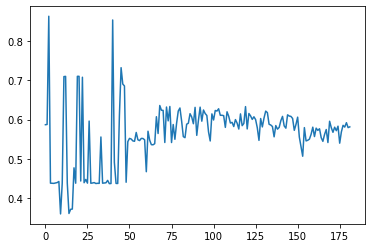

In [67]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

col = data_X.columns
score_record = []
features_record = []

# define the multinomial logistic regression model with all features
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(x_train, y_train)
print("beginning:", clf.score(x_test, y_test))

for i in range(1,183): # number of features selected
    
    #feature selection
    smf = SelectFromModel(clf, threshold = -np.inf, max_features = i)
    smf.fit(x_train, y_train)
    feature_idx = smf.get_support()
    feature_name = col[feature_idx]

    new_x_train = x_train[:,feature_idx]
    new_x_test = x_test[:,feature_idx]
    
    #model after feature selection
    clf_ = LogisticRegression(solver='lbfgs',multi_class='multinomial')
    clf_.fit(new_x_train,y_train)
    print(len(feature_name),":", clf_.score(new_x_test, y_test))
#     print(feature_name)
    score_record.append(clf_.score(new_x_test, y_test))
    features_record.append(feature_name)

plt.plot(score_record)

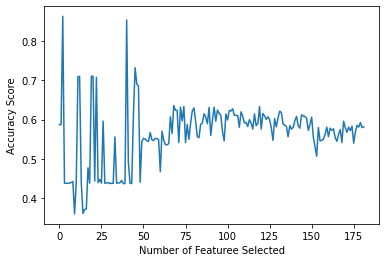

In [88]:
plt.plot(score_record)
plt.xlabel('Number of Featuree Selected')
plt.ylabel('Accuracy Score')
plt.savefig('LR_ACCURACY.png')

## Looking at the top 50 significant features

In [97]:
for k in range(1,50):

    a = features_record[k-1]
    b = features_record[k-1-1]
    c = []
    for i in a:
        if i not in b:
            c.append(i)
    for i in c:
        print(i)

park_cost
num_travelers
d_purpose_imputed
used_transit
transit_egress
work_mode_bus
work_mode_auto
taxi_cost
tnc_mode
work_park_amount_year
school_mode_bus
school_mode_rail
work_park_amount_month
school_mode_auto
school_park_amount_month
work_mode_rail
work_mode_ferry
work_mode_bike
school_park_amount_week
school_park_amount_year
bike_share_citi_bike
tnc_mode_auto
school_park_location
tnc_purpose
bike_share_jump
tnc_use_juno
school_type
school_vehicle_pass_period
no_bike_nyc_other
work_mode_scooter
work_scooter_park
work_vehicle_pass_period
trip_distance
d_cms_zone
sustainable_mode
work_cms_zone
work_park_amount_day
tnc_user
school_park_amount_day
work_bike_park
work_mode_taxi
car_share_car2go
telework_freq
jobs_count
industry
tnc_use_none
tnc_freq
o_purpose_category_imputed
